# 10\. MonteCarlo

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

### 1\. Radioactive decay chain (30 min)

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

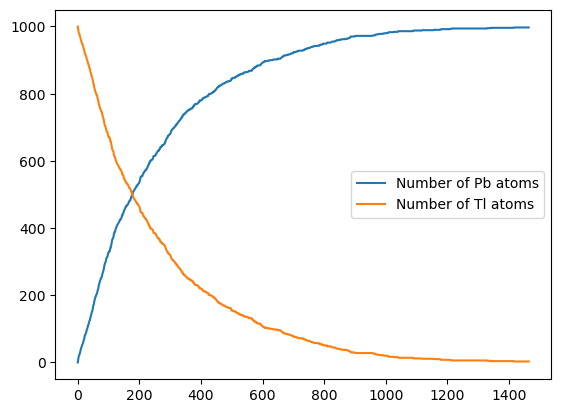

In [4]:
tau=3.052*60   #half life in seconds
num_tl=[1000]
num_pb=[0]

for i in range(int(8*tau)):
    decayed=0
    prob_t=1-(2**(-(1/tau)))    #dt=1, otherwise the half life happens when the integral up to that point is .5 and not when the prob is .5
    for j in range(num_tl[-1]):
        x=np.random.random()
        if(x<prob_t):
            decayed+=1
    num_tl.append(num_tl[-1]-decayed)
    num_pb.append(num_pb[-1]+decayed)

plt.plot(num_pb,label="Number of Pb atoms")
plt.plot(num_tl,label="Number of Tl atoms")
plt.legend()
plt.show()

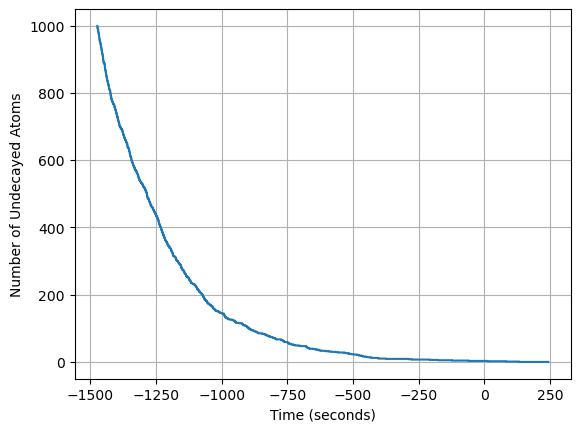

In [6]:
tau = 3.052 * 60  
total_atoms = 1000

#decay_times = -(tau/np.log(2)) * np.log(1 - np.random.rand(total_atoms))
decay_times = -(tau/np.log(2)) * np.log(tau/np.log(2) * np.random.rand(total_atoms))


decay_times.sort()

undecayed_atoms = total_atoms - np.arange(1, total_atoms + 1)

plt.step(decay_times, undecayed_atoms)
plt.xlabel('Time (seconds)')
plt.ylabel('Number of Undecayed Atoms')
plt.grid(True)
plt.show()

### 2\. Rutherford Scattering (30 min)

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

[0.08808775 0.1645106  0.0709504  ... 0.32731485 0.15156135 0.22382622]
Bounced back particle: 1553
Fraction of particles that bounce back: 0.001553


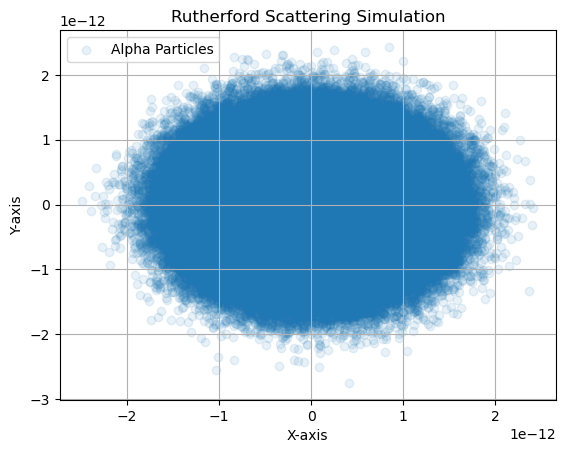

In [8]:
Z = 79  # Atomic number of Gold
e = 1.602e-19  # Elementary charge in coulombs
epsilon_0 = 8.854e-12  # Vacuum permittivity in F/m
E = 7.7e6 * 1.602e-19  # Energy in joules (converted from MeV)
a_0 = 5.292e-11  # Bohr radius in meters

# Simulation parameters
num_particles = 1000000
sigma = a_0/100

b_values = np.random.normal(0, sigma, size=(num_particles, 2))

theta_values = 2 * np.arctan((Z * e**2) / (2 * np.pi * epsilon_0 * E * np.linalg.norm(b_values, axis=1)))
print(theta_values)

bounce_back_count = np.sum(theta_values > np.pi/2)

bounce_back_fraction = bounce_back_count / num_particles

print(f'Bounced back particle: {bounce_back_count}')
print(f"Fraction of particles that bounce back: {bounce_back_fraction}")

plt.scatter(b_values[:, 0], b_values[:, 1], alpha=0.1, label='Alpha Particles')
plt.title('Rutherford Scattering Simulation')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

### 3\. Monte Carlo integration: hit/miss vs mean value method (30 min)

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [26]:
def f(x):
    return np.sin(1 / (x * (2 - x)))**2

exact_integral = np.pi / 2

a, b = 0, 2
N = 100000

#hit/miss
x_values = np.random.uniform(a, b, N)
y_values = np.random.uniform(0, 1, N)  #since f(x) is in [0, 1]

points_below_curve = np.sum(y_values < f(x_values))
integral_estimate = points_below_curve / N * (b - a)
error_hit_miss = np.abs(integral_estimate - exact_integral)

print(f"Integral estimate (Hit/Miss Method): {integral_estimate}")
print(f"Error (Hit/Miss Method): {error_hit_miss}")

#mean value
x_values_mean_value = np.random.uniform(a, b, N)
f_values_mean_value = f(x_values_mean_value)

integral_estimate_mean_value = np.mean(f_values_mean_value) * (b - a)
error_mean_value = np.abs(integral_estimate_mean_value - exact_integral)

print(f"\nIntegral estimate (Mean Value Method): {integral_estimate_mean_value}")
print(f"Error (Mean Value Method): {error_mean_value}")

Integral estimate (Hit/Miss Method): 1.44896
Error (Hit/Miss Method): 0.12183632679489653

Integral estimate (Mean Value Method): 1.4504657979393814
Error (Mean Value Method): 0.1203305288555152


### 4\. Monte Carlo integration in high dimension (30 min)

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



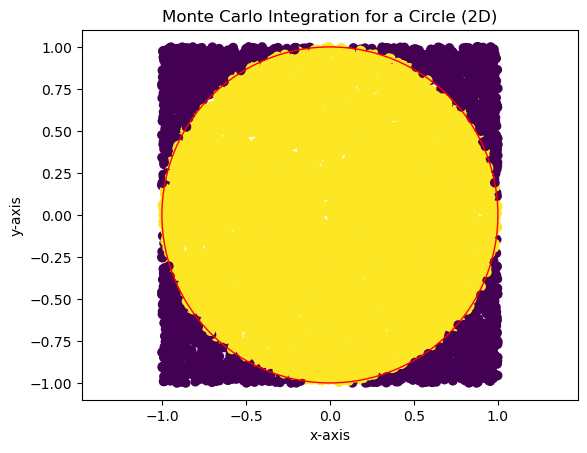

Estimated area of the unit circle: 3.1552

Estimated volume of the unit 10D sphere: 2.1504


In [36]:
N = 10000

#hit/miss
points = np.random.uniform(-1, 1, (N, 2))

inside_circle = np.sum(points**2, axis=1) <= 1

area_estimate = np.sum(inside_circle) / N * 4  #4 is the area of the square

plt.figure()
plt.scatter(points[:, 0], points[:, 1], c=inside_circle)
circle = plt.Circle((0, 0), 1, color='red', fill=False)
plt.gca().add_patch(circle)
plt.title('Monte Carlo Integration for a Circle (2D)')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.axis('equal')
plt.show()

print(f"Estimated area of the unit circle: {area_estimate}")

#10D sphere
D = 10

points_10D = np.random.uniform(-1, 1, (N, D))

inside_sphere_10D = (np.sum(points_10D**2, axis=1) <= 1) #boolean array

volume_estimate_10D = np.sum(inside_sphere_10D) / N * 2**D  #hypercube volume

print(f"\nEstimated volume of the unit 10D sphere: {volume_estimate_10D}")

### 5\. Monte Carlo integration with importance sampling (30 min) 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [9]:
def f(x):
    return x**(-1/2) / (np.exp(x) + 1)

def w(x):
    return 1 / np.sqrt(x)

N = 100000

x_samples = np.random.random(N)**2  #so that uniform becomes 1/sqrt(x)
integrand_values = f(x_samples) / w(x_samples)
integral_estimate = np.mean(integrand_values) * quad(w, 0, 1)[0]

print(f"Estimated value of the integral: {integral_estimate}")
print(quad(f, 0, 1)[0])

Estimated value of the integral: 0.8390334280278878
0.8389329600133838
